In [ ]:
# Practical Task M05T08
# Exploratory data analysis on the Titanic dataset.

In [ ]:
# Import librariers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Set color palette
sns.set_palette("Set2")

In [2]:
# Load data
df_titanic = pd.read_csv("Titanic.csv")

In [3]:
# Look at first ten rows of data
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Look at the shape of the data
df_titanic.shape

(891, 12)

### Cleaning

In [5]:
# Make sure there are no duplicates
df_titanic = df_titanic.drop_duplicates()

# View if the shape has changed
# If it changes, it means there were duplicates
df_titanic.shape

(891, 12)

There are still 891 records, meaning there where no duplicates.

In [6]:
# Look at a overview of the data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this overview we can see that some entries are missing (NaN)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


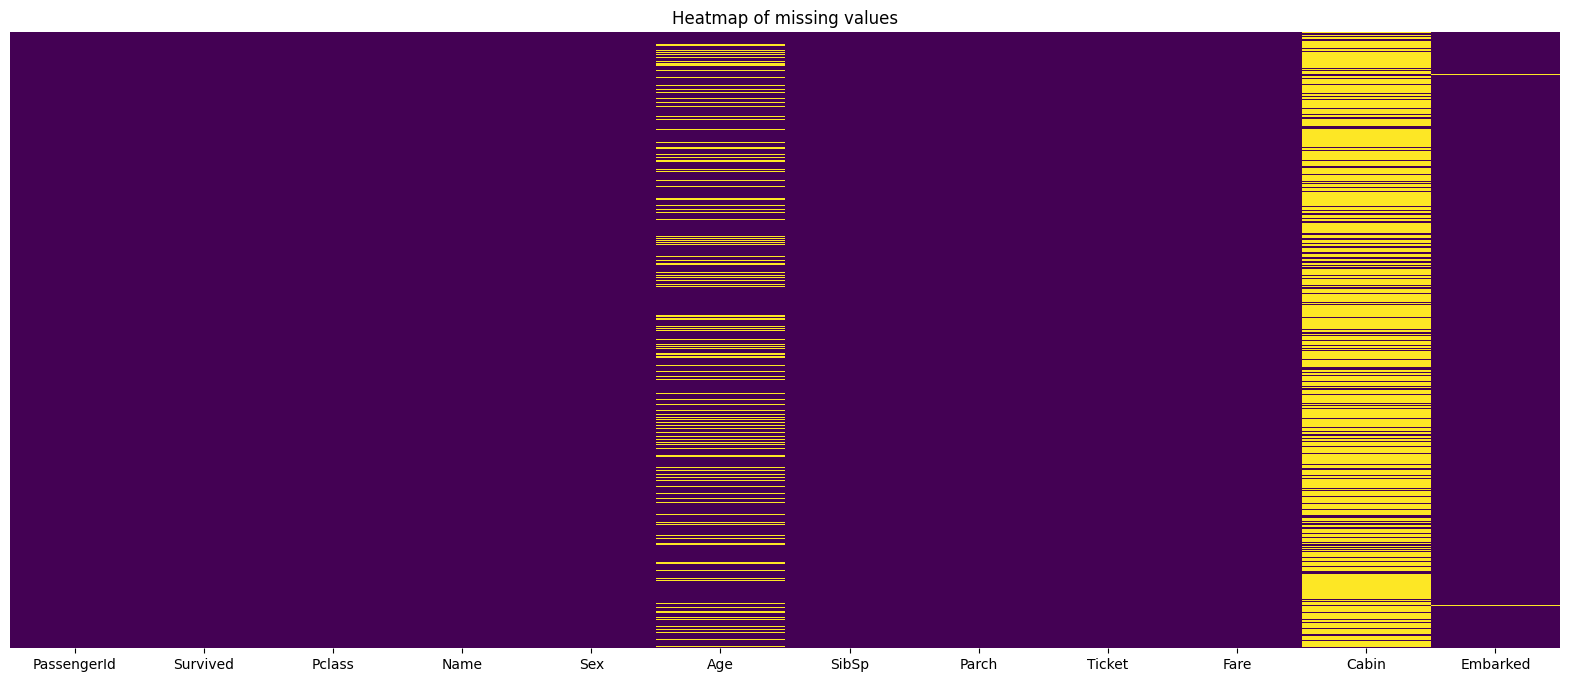

In [7]:
# Get a look at what is missing
sum_missing = df_titanic.isnull().sum()
print(sum_missing[0:12])
fig = plt.figure(figsize=(20, 8))
sns.heatmap(
    data=df_titanic.isnull(),
    cbar=False,
    yticklabels=False,
    cmap='viridis'
)
plt.title('Heatmap of missing values')
plt.show()

There are alot of missing values in the 'Age' and 'Cabin' columns and 2 in the 'Embarked' column.
The 'Age' colum can be filled with the median. For the 'Cabin' column, a new column can be made that only uses the first letter ('C', 'E', 'A') and the rest of the missing values can be filled with 'Unknown'. The 'Embarked' colum can be filled with the mode.

In [8]:
# Fill 'Age' with median
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

# Create new column with only first letter of 'Cabin' column entries
df_titanic['Cabin_Floor'] = df_titanic['Cabin'].str[0]

# Fill the rest of the NaN values with 'Unknown'
df_titanic['Cabin_Floor'] = df_titanic['Cabin_Floor'].fillna('Unknown')

# Fill 'Embarked' column with mode
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(
    df_titanic['Embarked'].mode()[0]
)

# Review first 10 observations
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Floor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Unknown
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Unknown
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Unknown


'Cabin_Floor' column was created so we can use that instead of the 'Cabin' column (which contains many missing values). Since we won't be using the 'Cabin' collumn, we can drop it. The 'Ticket', 'Name' and 'PassengerID' columns are also unnecessary.

In [9]:
# Drop the 'Cabin', 'Ticket' and 'PassengerID' column
df_titanic = df_titanic.drop('Cabin', axis=1)
df_titanic = df_titanic.drop('Ticket', axis=1)
df_titanic = df_titanic.drop('PassengerId', axis=1)
df_titanic = df_titanic.drop('Name', axis=1)

df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Floor
0,0,3,male,22.0,1,0,7.2500,S,Unknown
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,Unknown
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,Unknown


We can now go through the columns and start visualising some data. 

### Exploring and Visualising

#### Sex distribution and survivors depending on sex

Let's start with the distribution of sex among passengers.

Sex
male      577
female    314
Name: count, dtype: int64


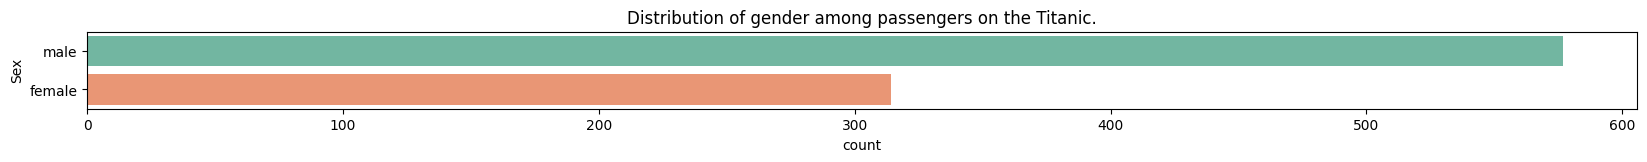

In [22]:
# How many males and female were on the Titanic
print(df_titanic.Sex.value_counts())  # Accurate count of sex

# Vizualise the count
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='Sex', hue='Sex', data=df_titanic)
plt.title('Distribution of gender among passengers on the Titanic.')
plt.show()

From this, we can see that there were far less females on board than males. This could be due to a number of reasons. Perhaps there were more male staff on board than female staff. The above count include children so there were also possibly more boys that girls.

Survived
0    549
1    342
Name: count, dtype: int64


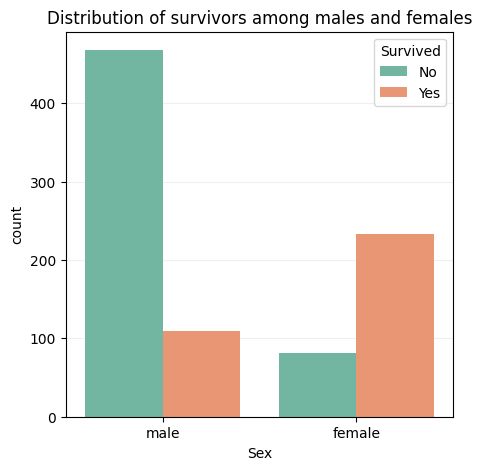

In [11]:
# How many of the males and females survived and how many did not
print(df_titanic.Survived.value_counts())
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Sex', hue='Survived', data=df_titanic, hue_order=[0, 1])

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# labels
plt.title('Distribution of survivors among males and females')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

From this we can see that the majority of the survivors are female. Among the males the number of deceased males (above 400) far exeed the number of surviving males (approximately 100). On the other hand, there are far more females who sirvived (approximately 250) than females who are deceased (below 100). There are also more surviving females than surviving males. This partially supports the line "Women and children first" as there are more women who survived. We can now also take a look at the distribution of survivors by their age.

#### Age distribution and survivors depending on age

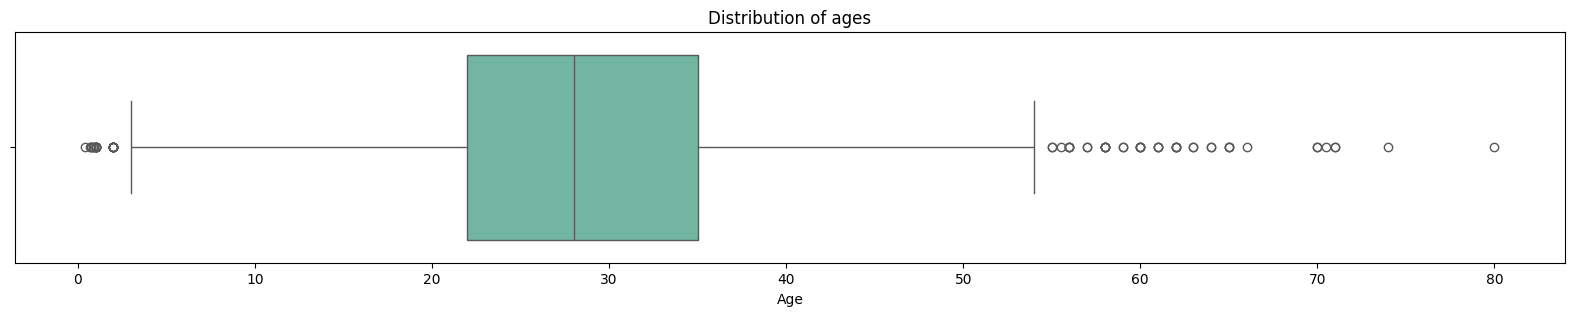

In [12]:
# Since we don't know the ages of the youngest or eldest,
# we can look at the distribution via a boxplot
fig = plt.figure(figsize=(20, 3))
sns.boxplot(x='Age', data=df_titanic)
plt.title("Distribution of ages")
plt.show()

This shows us the the oldest person is 80 and the yougest person is possibily a newborn that is only a few months old. From this we can decide on appropriate bins to put the ages in. The mean age seems to be approximately 28 years.

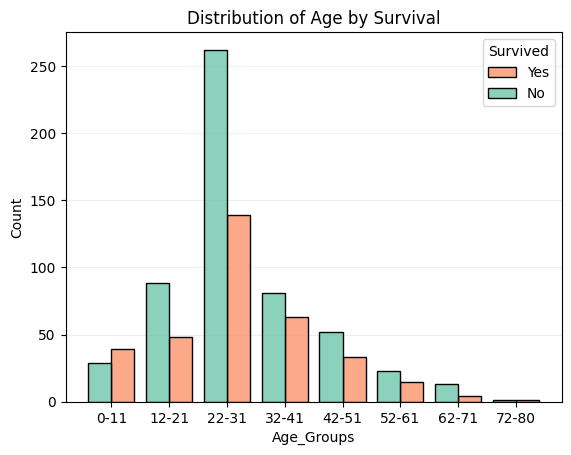

In [13]:
# Since there are many ages, bins would be more appropriate
# Create bins and labels
bins = [0, 11, 21, 31, 41, 51, 61, 71, 80]
labels = [
    '0-11', '12-21', '22-31', '32-41', '42-51', '52-61', '62-71', '72-80'
]

# Create a new column for the age groups
df_titanic['Age_Groups'] = pd.cut(df_titanic['Age'], bins=bins, labels=labels)

# Vizualization of age vs survival
fig, ax = plt.subplots()
sns.histplot(
    x='Age_Groups',
    hue='Survived',
    data=df_titanic,
    multiple='dodge',
    shrink=.8,
    hue_order=[0, 1]
)

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title("Distribution of Survivors depending on Age")
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

This shows us that the majority of people who did not survive are between the ages of 22 and 31. They also have the highest survival count. In almost every age group, the survival count is less than the number of people who did not survive. In the age group '0-11', however, the survival count is slightly higher than the number of deaths. This supports the second part of the previous line mentioned: "Women and children first". 

#### Survival depending on age and sex conbined

We can also look at the age and sex distribution together with the survival rate.

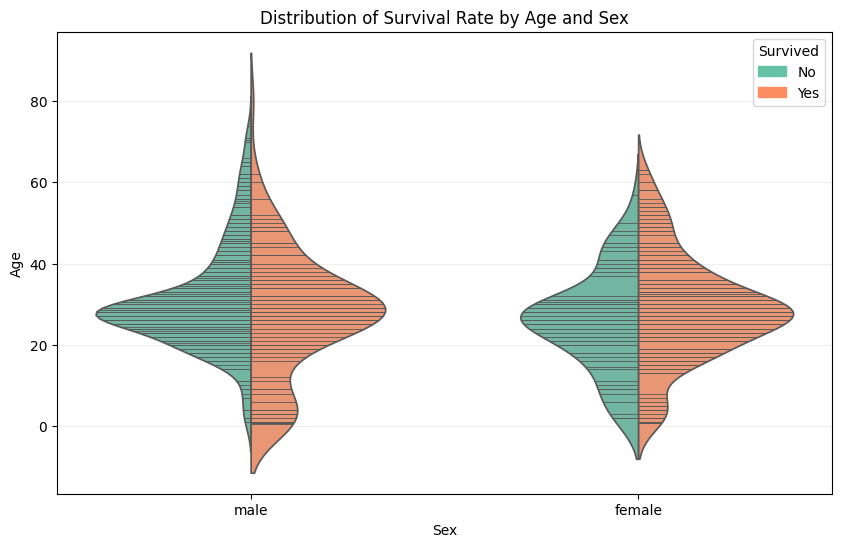

In [14]:
# Distribution of age and sex and survival
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
    x='Sex',
    y='Age',
    hue='Survived',
    data=df_titanic,
    split=True,
    inner='stick',
    hue_order=[0, 1]
)

# Set the grid behind the graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Create custom handles for the legend
handles = [
    mpatches.Patch(color=sns.color_palette('Set2')[0], label='No'),
    mpatches.Patch(color=sns.color_palette('Set2')[1], label='Yes')
]

# Labels
plt.title('Survival Rate depending on Age and Sex')
ax.legend(title='Survived', handles=handles)
plt.show()

Most of the survivors were between 20 and 40. The majority of the survivors were female and childern (especially boys) as shown by the dence sticks just above the age of 0. 

#### Class distribution and impact of fare

Let's take a look at how the class category had an impact on the survival rate.

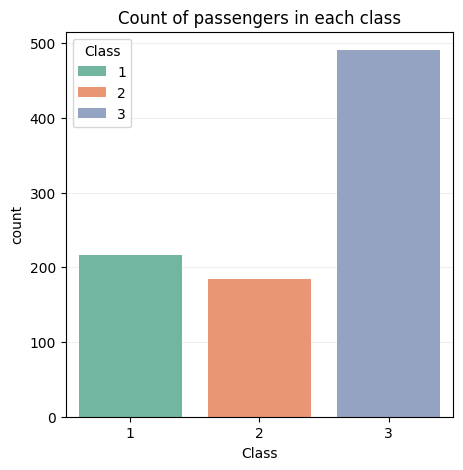

In [15]:
# Get a count of how many people were in each class
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Pclass', data=df_titanic, hue='Pclass', palette='Set2')

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title("Distribution of Passenger per Class")
plt.xlabel('Class')
plt.legend(title='Class')
plt.show()

The majority of the passengers were in the third class. According to the metadata, the third class was the lower-class passengers. This suggests that the tickets were cheaper, meaning that the first class was the most expensive (upper-class).

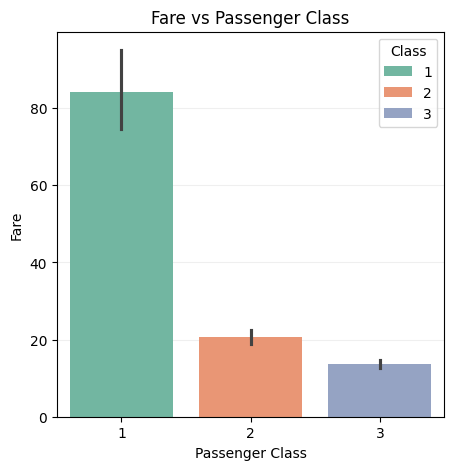

In [16]:
# To see if the tickets were infact cheaper for the lower-class,
# we can compare the class with the ticket fare.
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    x='Pclass', y='Fare', data=df_titanic, hue='Pclass', palette='Set2'
)

# Set grib behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title("Fare vs Passenger Class")
plt.legend(title='Class')
plt.xlabel("Passenger Class")
plt.show()

The above graph show that third class was indeed cheaper than the other classes which confirms why the majority of passengers had third class tickets.

#### Age and sex distribution per passenger class

Something else that would be interesting to see is the distribution of ages among each class.

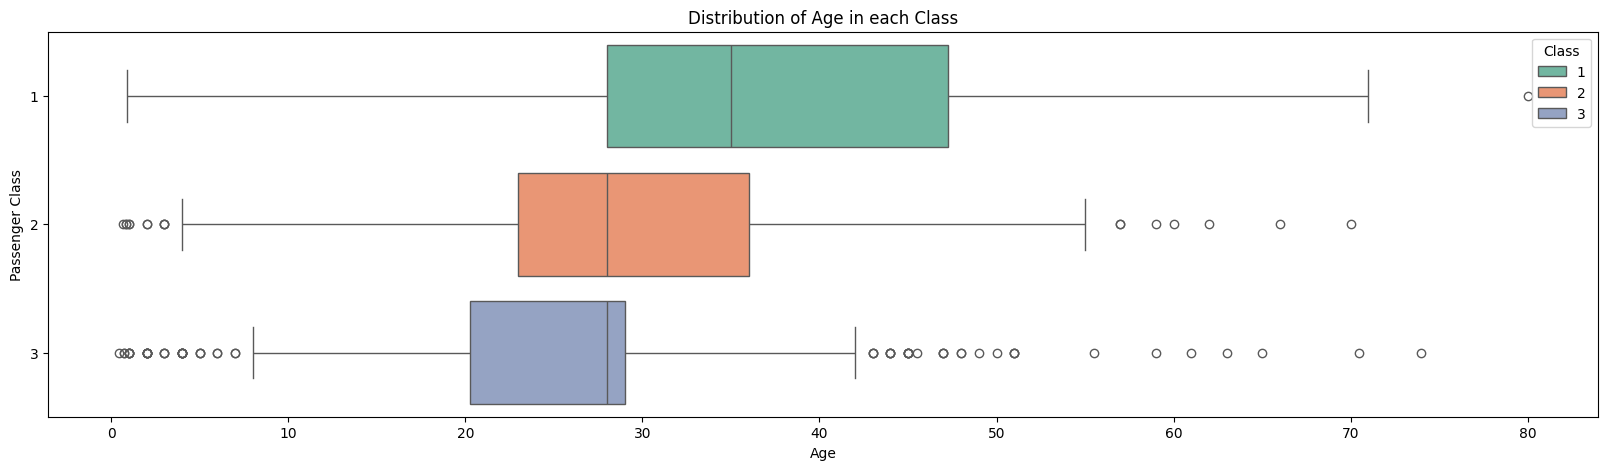

In [17]:
# Age distribution for each class
df_titanic['Pclass_Cat'] = df_titanic['Pclass'].astype('category')
fig = plt.figure(figsize=(20, 5))
sns.boxplot(
    x='Age', y='Pclass_Cat', data=df_titanic, hue='Pclass', palette='Set2'
)

# Labels
plt.title('Distribution of Age among Passenger Class')
plt.ylabel('Passenger Class')
plt.legend(title='Class')
plt.show()

It appears that the older passengers prefered a upper-class. There could be many reasons. One of which could be that older passengers could have saved up money to buy a upper-class ticket. There are some outliers where passengers between 55 and 80 paid for a third or second class ticket. As concluded earlier, most of the passengers who did not survive was between 20 and 40 years of age. The mean ages also fall in that range.

What did the sex distribution among the passenger classes look like?

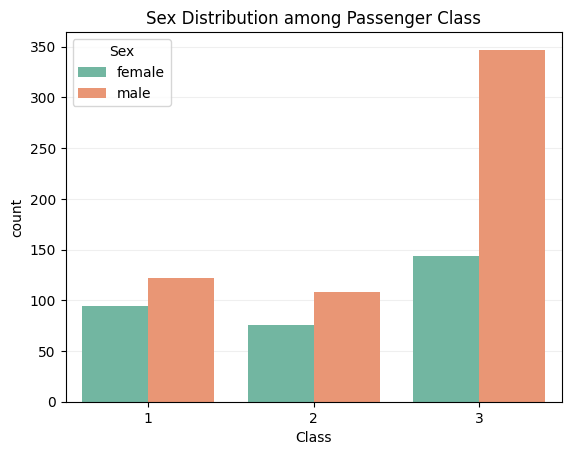

In [18]:
# Distribution of male and female passenger class
fig, ax = plt.subplots()
sns.countplot(x='Pclass', hue='Sex', data=df_titanic, palette='Set2')

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Sex Distribution among Passenger Class')
plt.legend(title='Sex')
plt.xlabel('Class')
plt.show()

We saw earlier that the majority of passengers who did not survive were male. There also appears to be much more male passengers in the third class. Could this also mean that the majority of people who did not survive also belonged to the third class? According to the movie, upper-class passengers were given preference on lifeboats. To see if the data also confirms this and if the majority of deaths belong to the third class, let's look at the survival count per class.

#### Survivor distribution among passenger class

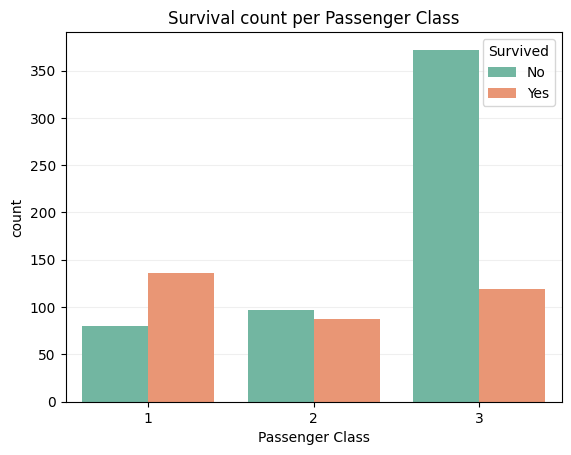

In [19]:
# Distribution of survivors among passenger classes
fig, ax = plt.subplots()
sns.countplot(x='Pclass', data=df_titanic, hue='Survived', hue_order=[0, 1])

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Survival count per Passenger Class')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The majority of passengers who did not survive belonged to the third/lower-class category as predicted with the previous graph. The first/upper-class category is the only class where the number of people who survived are more than the number of people who did not. This suggests that the movie was accurate about the upper-class passengers having preference on lifeboats.

Another question that might factor in on upper-class passengers receiving preference on lifeboats: does upper-class also mean a higher (closer to the surface) floor level? As seen earlier, the floor level had many unknown (missing) values. First, we will get an overall look.

#### Passenger class vs floor level

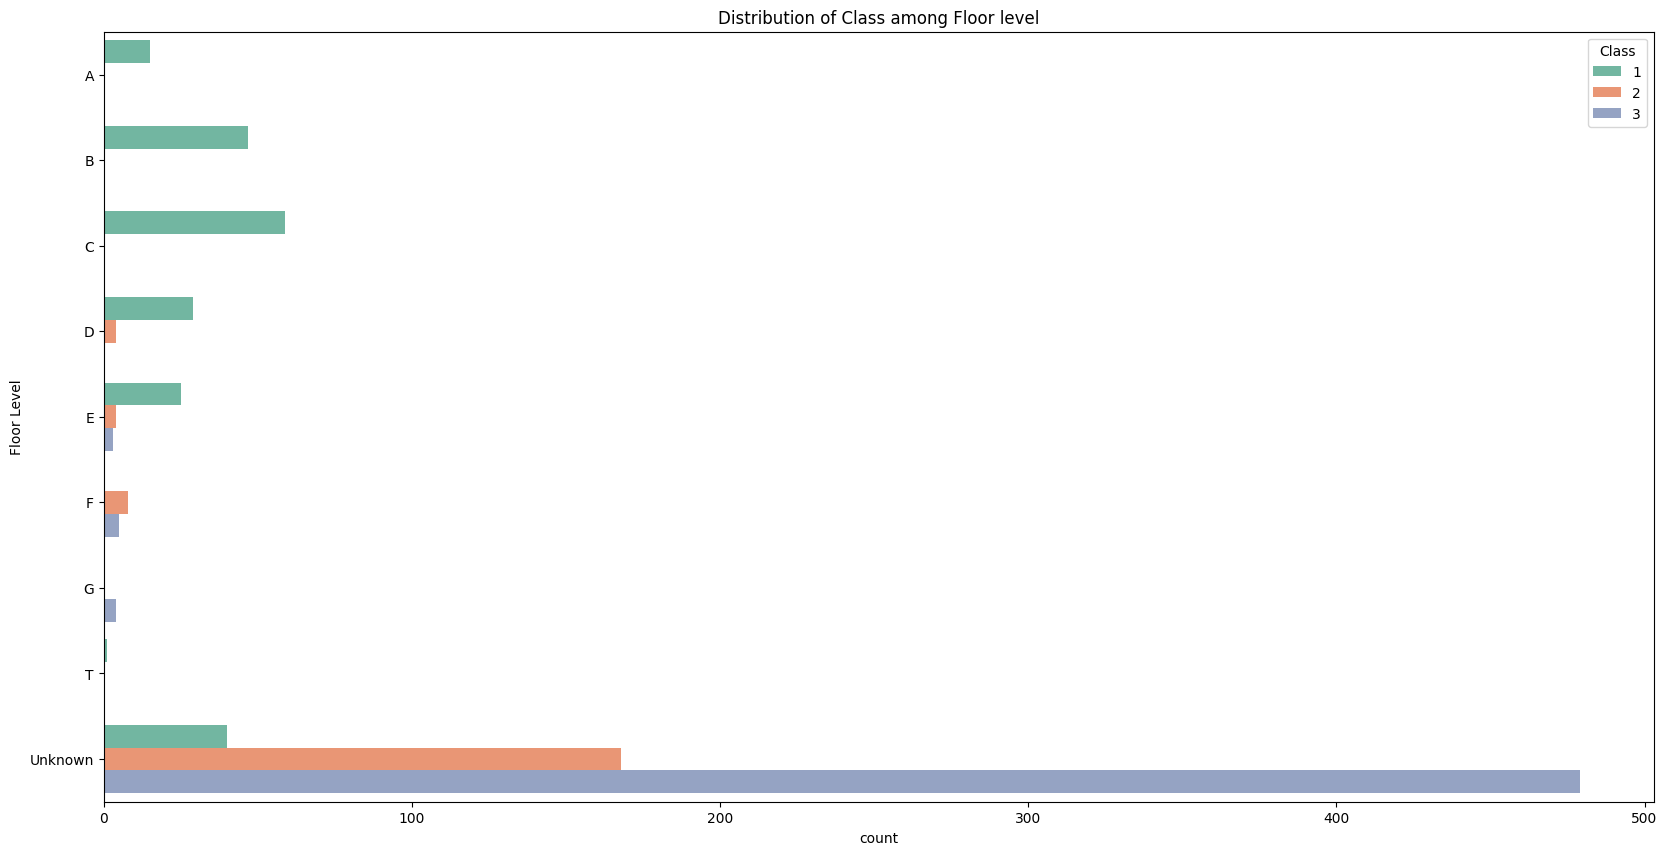

In [20]:
# Let's see if passenger class affects floor level
# Sort 'Cabin_Floor' alphabetically
floor_order = sorted(df_titanic['Cabin_Floor'])

# Get an general overview of floor level vs class
fig = plt.figure(figsize=(20, 10))
sns.countplot(
    y='Cabin_Floor',
    hue='Pclass',
    data=df_titanic,
    order=floor_order,
    palette='Set2'
)

# Labels
plt.title('Passenger Class vs Floor Level')
plt.ylabel('Floor Level')
plt.legend(title='Class')
plt.show()

From some earlier data cleaning, we know there were many values missing the 'Cabin' columns which we replaced with 'Unknown'. As the majority of the missing data fall into the 'Unknown' column, we cannot accurately correlate them to a specific floor level. We can now filter out the 'Unknown' category to take a closer look at the rest.

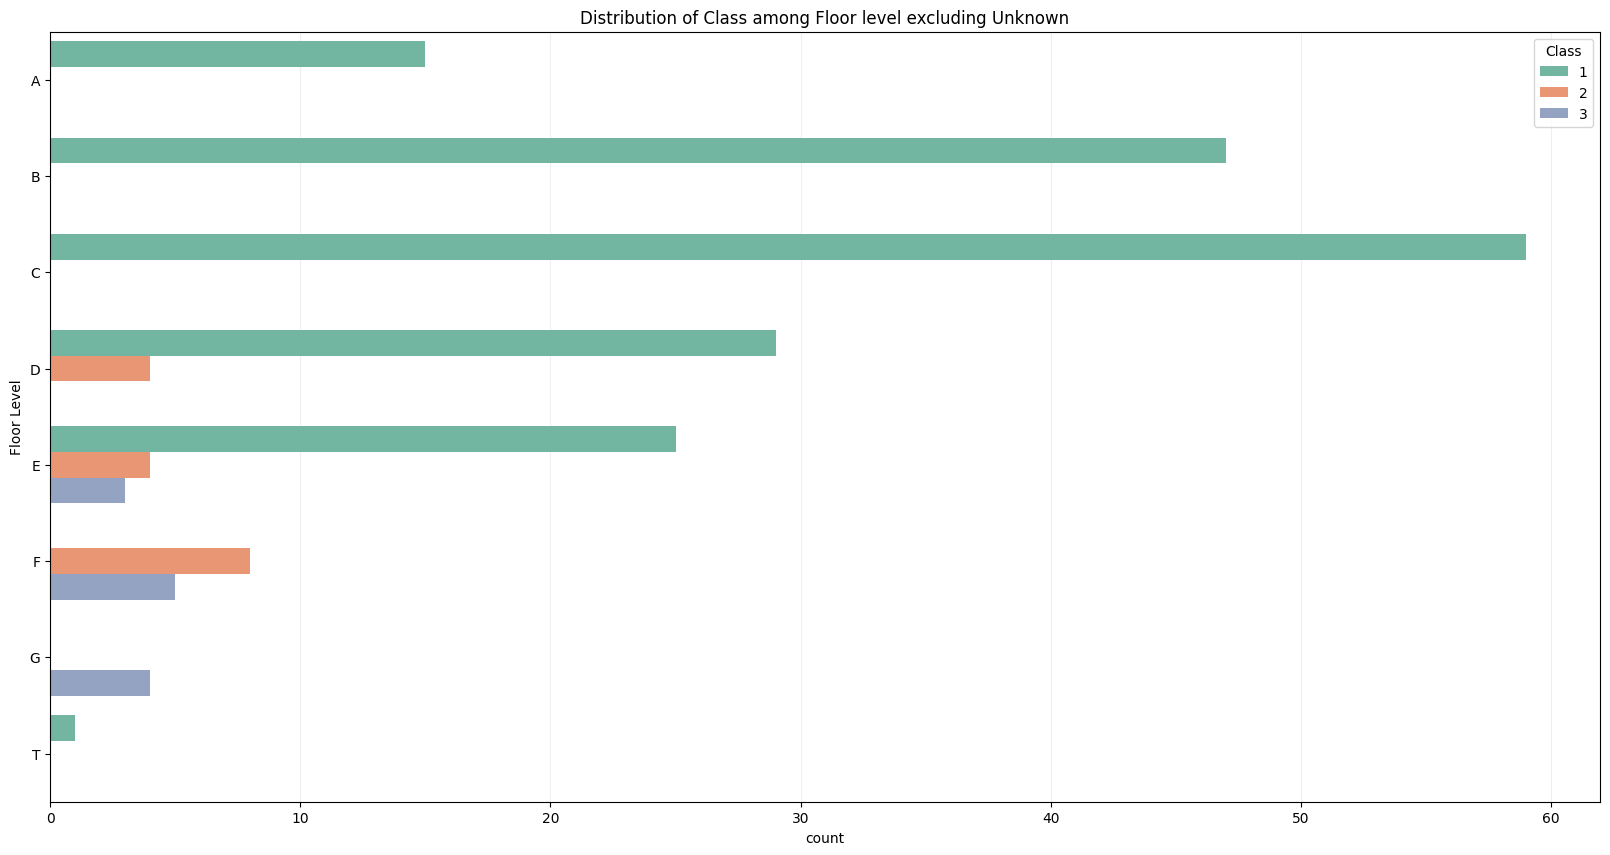

In [21]:
# Filter out 'Unknown'
filtered_floor = df_titanic[df_titanic['Cabin_Floor'] != 'Unknown']
floor_order = sorted(filtered_floor['Cabin_Floor'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(
    y='Cabin_Floor',
    hue='Pclass',
    data=df_titanic,
    order=floor_order,
    palette='Set2'
)

# Set grid behind grapgh
ax.set_axisbelow(True)
ax.grid(axis='x', alpha=0.2)

# Labels
plt.title("Passenger Class vs Floor Level (excluding 'Unknown')")
plt.ylabel('Floor Level')
plt.legend(title='Class')
plt.show()

We can now see that the answer to the question "Does upper-class also mean a higher (closer to the surface) floor level?", is yes. According to the plot above, floor level A, B and C are upper-class passengers. The majority on level D is upper-class passengers with some second/middle-class passengers. Level E also has upper-class and second-class passengers, but here are also some lower-class passengers. Level F has no upper-class passengers and level G only has lower-class passengers. This means that it was probable that the upper-class passengers were also closer to the top floor where the lifeboats may have been.

### Conclusion

We can conclude that the most important factor for determining wheter a person survived or not was sex. The odds of a female passenger surviving were much higher than that of a male passenger. Another factor was age. The odds of a child surviving was much higher. This confirms the "Women and children first" statement. A third factor that increased the odds of survival was passenger class. The higher the class, the higher the chances of survival which confirms that upper-class passengers were given preference on lifeboats. We also so that passenger class also affecter the floor level which meant the higher the class, the closer to the upper deck and also closer to the life boats.